In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --upgrade tensorflow

In [4]:
!pip install keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [12]:
cnn = tf.keras.models.load_model(r'C:\Users\Kritika\OneDrive\Desktop\Cancer_detection\Train_Cancer_Disease.keras')

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,179,037 (54.09 MB)

 Trainable params: 4,726,345 (18.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,452,692 (36.06 MB)

In [14]:
!pip install opencv-python

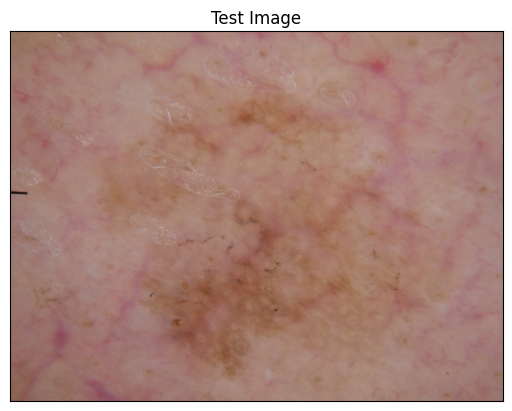

In [15]:
import cv2
image_path = r"C:\Users\Kritika\OneDrive\Desktop\Cancer_detection\Test\actinic keratosis\ISIC_0010512.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


**Test set Image Processing**

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [17]:
prediction = cnn.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


(array([[0.06986503, 0.14762098, 0.04674322, 0.18420197, 0.16030057,
         0.18385279, 0.06010783, 0.10502248, 0.04228506]], dtype=float32),
 (1, 9))

In [18]:
result_index = np.argmax(prediction) #Return index of max element
print(result_index)

3


In [19]:
import os
os.chdir('/content/drive/My Drive/Cancer_detection')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/Cancer_detection'

In [20]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 118 files belonging to 9 classes.


Using 23 files for validation.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


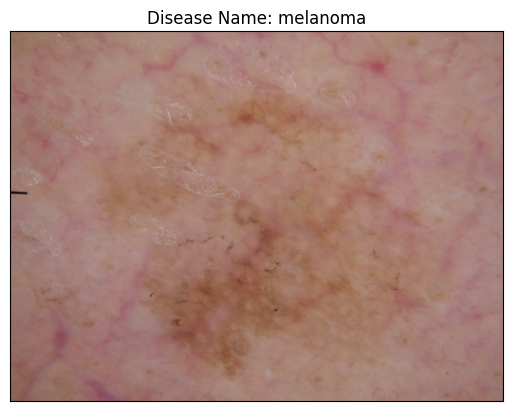

In [21]:
# Displaying the disease prediction
cnn_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {cnn_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
!pip install streamlit

In [102]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import os
os.chdir('/content/drive/My Drive/Cancer_detection')


In [104]:
# Open main.py in write mode ('w') and write your streamlit code into it
with open('main.py', 'w') as f:
    f.write('''
import streamlit as st

# Title for the web app
st.title('Skin Cancer Detection App')

# File uploader to upload the image
uploaded_file = st.file_uploader("Choose a skin image...", type="jpg")

if uploaded_file is not None:
    # Display uploaded image
    st.image(uploaded_file, caption='Uploaded Skin Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Add your image processing and model prediction code here
    # For example: st.write("Detected Disease: Skin Cancer")
    # Add other details about the disease or cure after prediction
''')


In [106]:
!pip install streamlit


In [107]:
!pip install pyngrok


In [108]:
%%writefile main.py
import streamlit as st

st.title("Skin Cancer Detection App")

uploaded_file = st.file_uploader("Choose a skin image...", type="jpg")

if uploaded_file is not None:
    st.image(uploaded_file, caption='Uploaded Skin Image.', use_column_width=True)
    st.write("Classifying...")
    # Add your image classification code here


Overwriting main.py


In [110]:
!pip choco install ngrok

ERROR: unknown command "choco" - maybe you meant "check"


In [111]:
!ngrok config add-authtoken 2m6Kywp3AJns4B1ly40xLuvLs1S_2tetEn4soT6nQqNNs8NSc

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [116]:
!ngrok http://localhost:8080

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions

In [118]:
!streamlit run main.py --server.port 8080



2024-09-15 09:33:42.507 Port 8080 is already in use


In [ ]:
!streamlit run main.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.57.210:8501



In [115]:
from pyngrok import ngrok

# Start Streamlit in the background
!streamlit run main.py &

# Expose the Streamlit app using ngrok
public_url = ngrok.connect(port='ngrok http http://localhost:8080')
print(f"Streamlit app is live at: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.57.210:8501

  Stopping...


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}
